## ANALYSIS

### Import necessary libraries

In [44]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### Merge data from each month into one CSV

In [4]:
files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("./Output/all_data.csv", index=False)

### Read into updated dataframe

In [5]:
all_data = pd.read_csv("./Output/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!

##### Drop rows of NaN

In [23]:
all_data = all_data.dropna(how="all")

##### Find "Or" and delete it

In [7]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

##### Convert columns to the correct type

In [8]:
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])

### Augment data with additional columns

### Add month column

In [9]:
all_data["Month"] = all_data["Order Date"].str[0:2]
pd.to_numeric(all_data["Month"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### Add sales column

In [10]:
all_data["Sales"] = all_data["Price Each"] * all_data["Quantity Ordered"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


### Question 1: What was the best month for sales? How much was earned?

#### Plot a graph

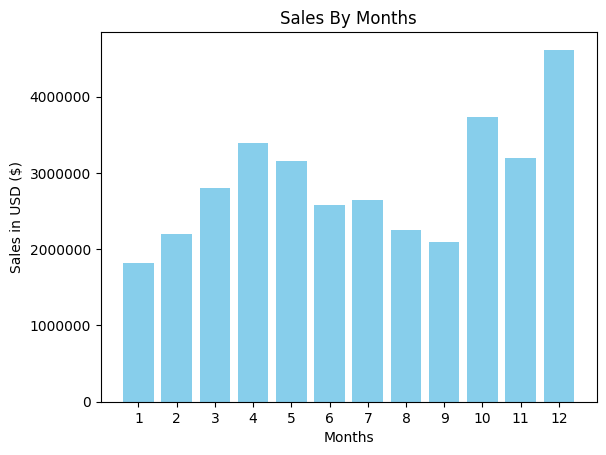

In [51]:
results = all_data.groupby("Month")["Sales"].sum()
months = range(1, 13)

plt.title("Sales By Months")
plt.bar(months, results, color='skyblue')
plt.xticks(months)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Months")
plt.ylabel("Sales in USD ($)")
plt.show()

### Question 2 : What city had highest number of sales?

#### Add city column

In [16]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


#### Plot a graph

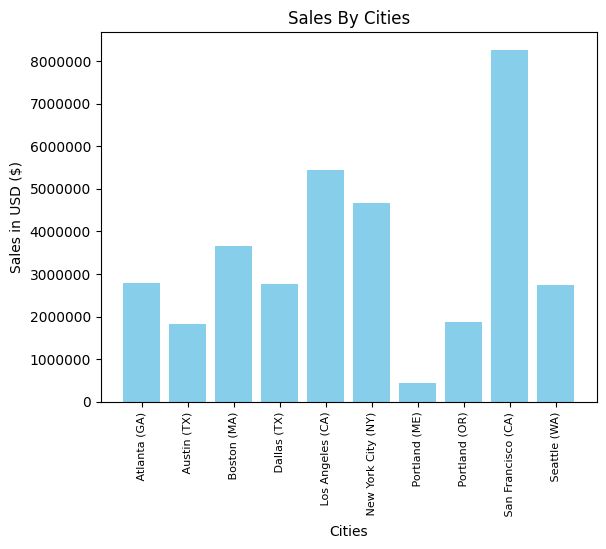

In [50]:
results = all_data.groupby("City")["Sales"].sum()
cities = [city for city, df in all_data.groupby("City")] 

plt.title("Sales By Cities")
plt.bar(cities, results, color='skyblue')
plt.xticks(cities, rotation="vertical", size=8)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Cities")
plt.ylabel("Sales in USD ($)")
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer`s buying product?

#### Add a hour column

In [32]:
def get_hour(order_date):
    return order_date.split(' ')[1].split(':')[0]
    
all_data["Hour"] = all_data["Order Date"].apply(lambda x: get_hour(x))
all_data["Hour"] = pd.to_numeric(all_data["Hour"])

#### Plot a graph

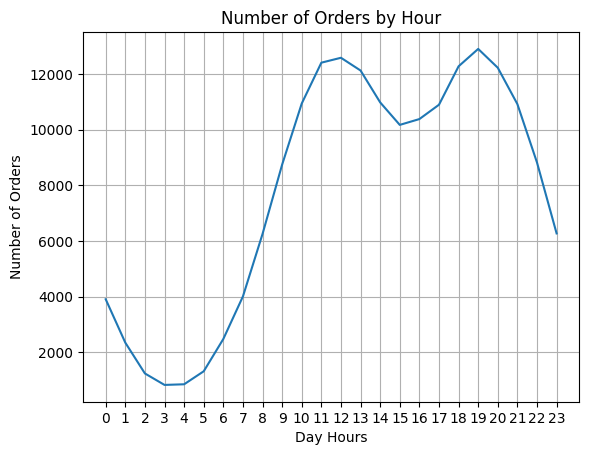

In [54]:
results = all_data.groupby("Hour")["Quantity Ordered"].count()
hours = [hour for hour, df in all_data.groupby("Hour")]

plt.title("Number of Orders by Hour")
plt.plot(hours, results)
plt.xticks(hours)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Day Hours")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

### Question 4: What products are most often sold together

#### Find the most frequently sold product combinations

In [52]:
grouped = all_data.groupby("Order ID")["Product"].apply(lambda x: ','.join(x))

count =  Counter()

for row in grouped:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

most_common_10 = count.most_common(10)

#### Plot a graph

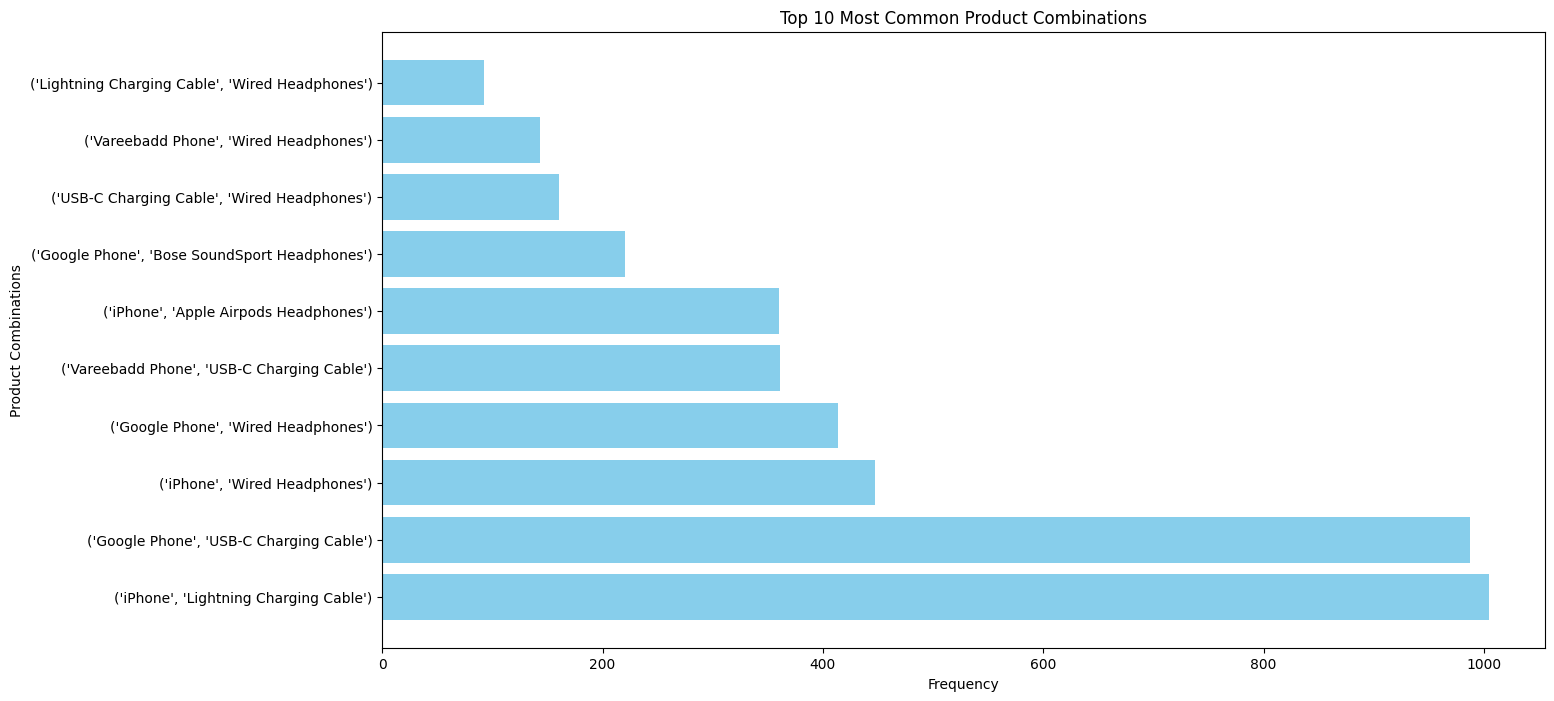

In [53]:
keys = [str(key) for key, value in most_common_10]
values = [value for key, value in most_common_10]

plt.figure(figsize=(15, 8))
plt.barh(keys, values, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Product Combinations')
plt.title('Top 10 Most Common Product Combinations')
plt.show()

### Question 5: What product sold the most?

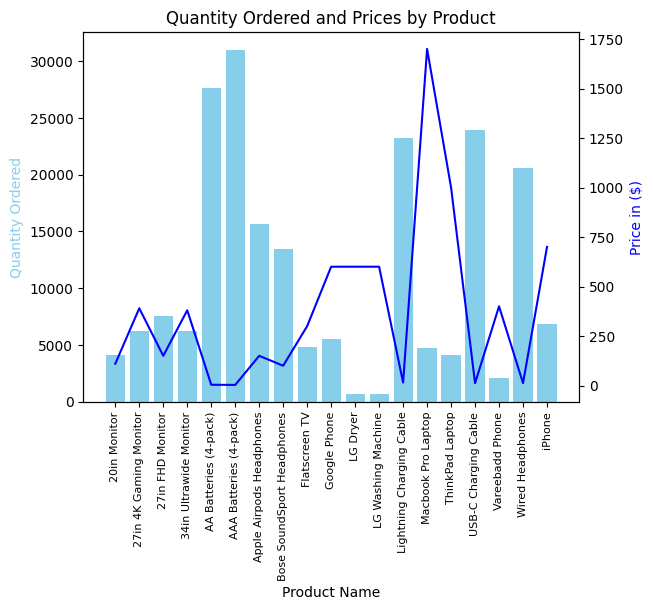

In [61]:
product_group = all_data.groupby("Product")
quantity = product_group["Quantity Ordered"].sum()
products = [product for product, df in all_data.groupby("Product")]
prices = product_group["Price Each"].mean()

fig, ax1 = plt.subplots()
plt.title("Quantity Ordered and Prices by Product")
ax2 = ax1.twinx()
ax1.bar(products, quantity, color='skyblue')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color='skyblue')
ax2.set_ylabel("Price in ($)", color='blue')
ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()